In [79]:
!pip install imbalanced-learn

In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import re # for regex
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
import requests
from bs4 import BeautifulSoup
import nltk

In [81]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.imdb.com/title/tt1517268/reviews/?ref_=tt_ql_2'
link = 'https://www.imdb.com/title/tt1517268/reviews/_ajax'
params = {
    'ref_': 'undefined',
    'paginationKey': ''
}
reviewsList = []
with requests.Session() as s:
    s.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36'
    res = s.get(url)
    while True:
        soup = BeautifulSoup(res.text, "lxml")
        for item in soup.select(".review-container"):
            reviewText = item.select_one(".text.show-more__control").get_text(strip=True)
            reviewsList.append({'Review': reviewText})
        try:
            paginationKey = soup.select_one(".load-more-data[data-key]").get("data-key")
        except AttributeError:
            break
        params['paginationKey'] = paginationKey
        res = s.get(link, params=params)
# Create a DataFrame from the list of reviews.
df = pd.DataFrame(reviewsList)
print(df)
#Save the DataFrame to a CSV file.
df.to_csv('imdb_reviews.csv', index=False)

                                                 Review
0     Margot does the best with what she's given, bu...
1     Before making Barbie (2023),Greta Gerwigsingle...
2     The first reason to go see it:It's good fun. I...
3     As much as it pains me to give a movie called ...
4     As a woman that grew up with Barbie, I was ver...
...                                                 ...
1478  I'm NOT a Barbie girl in NOT the Barbie World,...
1479  The movie is mediocre at best. I expected an o...
1480  Some things were super clever and made me laug...
1481  For sure It failed to achieve feminism or be a...
1482  Barbie is cute, creative and fun. The acting i...

[1483 rows x 1 columns]


In [82]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [83]:
df.head()

,Review
0,"Margot does the best with what she's given, bu..."
1,"Before making Barbie (2023),Greta Gerwigsingle..."
2,The first reason to go see it:It's good fun. I...
3,As much as it pains me to give a movie called ...
4,"As a woman that grew up with Barbie, I was ver..."


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1483 non-null   object
dtypes: object(1)
memory usage: 11.7+ KB


In [85]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
df.Review = df.Review.apply(clean)
df.Review[0]

'Margot does the best with what she\'s given, but this film was very disappointing to me. It was marketed as a fun, quirky satire with homages to other movies. It started that way, but ended with over-dramatized speeches and an ending that clearly tried to make the audience feel something, but left everyone just feeling confused. And before you say I\'m a crotchety old man, I\'m a woman in my 20s, so I\'m pretty sure I\'m this movie\'s target audience. The saddest part is there were parents with their kids in the theater that were victims of the poor marketing, because this is not a kid\'s movie. Overall, the humor was fun on occasion and the film is beautiful to look at, but the whole concept falls apart in the second half of the film and becomes a pity party for the "strong" woman.'

In [86]:
def isSpecialCharacter(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

In [87]:
df.Review = df.Review.apply(isSpecialCharacter)
df.Review[0]

'Margot does the best with what she s given  but this film was very disappointing to me  It was marketed as a fun  quirky satire with homages to other movies  It started that way  but ended with over dramatized speeches and an ending that clearly tried to make the audience feel something  but left everyone just feeling confused  And before you say I m a crotchety old man  I m a woman in my 20s  so I m pretty sure I m this movie s target audience  The saddest part is there were parents with their kids in the theater that were victims of the poor marketing  because this is not a kid s movie  Overall  the humor was fun on occasion and the film is beautiful to look at  but the whole concept falls apart in the second half of the film and becomes a pity party for the  strong  woman '

In [88]:
def toLower(text):
    return text.lower()
df.Review = df.Review.apply(toLower)
df.Review[0]

'margot does the best with what she s given  but this film was very disappointing to me  it was marketed as a fun  quirky satire with homages to other movies  it started that way  but ended with over dramatized speeches and an ending that clearly tried to make the audience feel something  but left everyone just feeling confused  and before you say i m a crotchety old man  i m a woman in my 20s  so i m pretty sure i m this movie s target audience  the saddest part is there were parents with their kids in the theater that were victims of the poor marketing  because this is not a kid s movie  overall  the humor was fun on occasion and the film is beautiful to look at  but the whole concept falls apart in the second half of the film and becomes a pity party for the  strong  woman '

In [89]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def stopWords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w.lower() not in stop_words]

df['Review'] = df['Review'].apply(stopWords)
print(df['Review'][0])


['margot', 'best', 'given', 'film', 'disappointing', 'marketed', 'fun', 'quirky', 'satire', 'homages', 'movies', 'started', 'way', 'ended', 'dramatized', 'speeches', 'ending', 'clearly', 'tried', 'make', 'audience', 'feel', 'something', 'left', 'everyone', 'feeling', 'confused', 'say', 'crotchety', 'old', 'man', 'woman', '20s', 'pretty', 'sure', 'movie', 'target', 'audience', 'saddest', 'part', 'parents', 'kids', 'theater', 'victims', 'poor', 'marketing', 'kid', 'movie', 'overall', 'humor', 'fun', 'occasion', 'film', 'beautiful', 'look', 'whole', 'concept', 'falls', 'apart', 'second', 'half', 'film', 'becomes', 'pity', 'party', 'strong', 'woman']


In [91]:
def stemText(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])
df.Review = df.Review.apply(stemText)
df.Review[0]

'margot best given film disappoint market fun quirki satir homag movi start way end dramat speech end clear tri make audienc feel someth left everyon feel confus say crotcheti old man woman 20s pretti sure movi target audienc saddest part parent kid theater victim poor market kid movi overal humor fun occas film beauti look whole concept fall apart second half film becom piti parti strong woman'

In [ ]:
df.head()

,Review
0,margot best given film disappoint market fun q...
1,make barbi 2023 greta gerwigsingl hand direct ...
2,first reason go see good fun fairytal comedi t...
3,much pain give movi call barbi 10 10 brilliant...
4,woman grew barbi excit movi curious see would ...


In [92]:
# Beginning the sentiment intensity analyzer.
sia = SentimentIntensityAnalyzer()
# Creating a function to determine the sentiment of a review.
def get_sentiment(review):
    sentiment = sia.polarity_scores(review)
# Return the composite score, which is a single number that represents the sentiment
    return sentiment['compound']
# Apply the function to the DataFrame's 'Review' column.
df['Sentiment'] = df['Review'].apply(get_sentiment)

In [93]:
df.head()

,Review,Sentiment
0,margot best given film disappoint market fun q...,0.8481
1,make barbi 2023 greta gerwigsingl hand direct ...,0.9805
2,first reason go see good fun fairytal comedi t...,0.9824
3,much pain give movi call barbi 10 10 brilliant...,0.9719
4,woman grew barbi excit movi curious see would ...,-0.2500


In [94]:
# Make use of sentiment analysis and categorization.
def categorizeSentiment(sentiment_score):
    if sentiment_score < -0.5:
        return 'strong negative'
    elif sentiment_score >= -0.5 and sentiment_score < -0.1:
        return 'negative'
    elif sentiment_score >= -0.1 and sentiment_score < 0.1:
        return 'neutral'
    elif sentiment_score >= 0.1 and sentiment_score < 0.5:
        return 'positive'
    else:
        return 'strong positive'
df['Sentiment'] = df['Review'].apply(get_sentiment)
df['Sentiment_Category'] = df['Sentiment'].apply(categorizeSentiment)

In [95]:
df.head()

,Review,Sentiment,Sentiment_Category
0,margot best given film disappoint market fun q...,0.8481,strong positive
1,make barbi 2023 greta gerwigsingl hand direct ...,0.9805,strong positive
2,first reason go see good fun fairytal comedi t...,0.9824,strong positive
3,much pain give movi call barbi 10 10 brilliant...,0.9719,strong positive
4,woman grew barbi excit movi curious see would ...,-0.2500,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Review              1483 non-null   object 
 1   Sentiment           1483 non-null   float64
 2   Sentiment_Category  1483 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.9+ KB


In [ ]:
df.Sentiment_Category.value_counts()

strong positive    1314
strong negative      58
positive             51
negative             44
neutral              16
Name: Sentiment_Category, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = df['Review']
y = df['Sentiment_Category']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.values.reshape(-1, 1), y)
balanced_data = pd.DataFrame({'Review': X_resampled.flatten(), 'Sentiment_Category': y_resampled})
print(balanced_data['Sentiment_Category'].value_counts())

strong positive    1314
negative           1314
positive           1314
strong negative    1314
neutral            1314
Name: Sentiment_Category, dtype: int64


In [ ]:
balanced_data.Sentiment_Category.replace('strong positive',2,inplace=True)
balanced_data.Sentiment_Category.replace('positive',1,inplace=True)
balanced_data.Sentiment_Category.replace('neutral',0,inplace=True)
balanced_data.Sentiment_Category.replace('negative',-1,inplace=True)
balanced_data.Sentiment_Category.replace('strong negative',-2,inplace=True)
balanced_data.head(10)

,Review,Sentiment_Category
0,margot best given film disappoint market fun q...,2
1,make barbi 2023 greta gerwigsingl hand direct ...,2
2,first reason go see good fun fairytal comedi t...,2
3,much pain give movi call barbi 10 10 brilliant...,2
4,woman grew barbi excit movi curious see would ...,-1
5,pain say enjoy movi much expect music number h...,2
6,know put spoiler super worn haha put clue movi...,2
7,thought would much differ end made feel sad em...,-1
8,qualiti humor write movi fun quirki uniqu get ...,2
9,went see today everyon group dress pink readi ...,2


In [ ]:

balanced_data.Review[0]

'margot best given film disappoint market fun quirki satir homag movi start way end dramat speech end clear tri make audienc feel someth left everyon feel confus say crotcheti old man woman 20s pretti sure movi target audienc saddest part parent kid theater victim poor market kid movi overal humor fun occas film beauti look whole concept fall apart second half film becom piti parti strong woman'

In [ ]:
# X = np.array(balanced_data.iloc[:,0].values)
# y = np.array(balanced_data.Sentiment_Category.values)
# cv = CountVectorizer(max_features = 1000)
# X = cv.fit_transform(balanced_data.Review).toarray()
# print("X.shape = ",X.shape)
# print("y.shape = ",y.shape)

In [ ]:
# print(X)

In [ ]:
# trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.2,random_state=9)
# print("Train shapes : X = {}, y = {}".format(trainx.shape,trainy.shape))
# print("Test shapes : X = {}, y = {}".format(testx.shape,testy.shape))

In [ ]:
# gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
# gnb.fit(trainx,trainy)
# mnb.fit(trainx,trainy)
# bnb.fit(trainx,trainy)

In [ ]:
# ypg = gnb.predict(testx)
# ypm = mnb.predict(testx)
# ypb = bnb.predict(testx)

# print("Gaussian = ",accuracy_score(testy,ypg))
# print("Multinomial = ",accuracy_score(testy,ypm))
# print("Bernoulli = ",accuracy_score(testy,ypb))

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
# Use TF-IDF instead of CountVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(balanced_data.Review).toarray()

# Split the data
trainx, testx1, trainy, testy1 = train_test_split(X_tfidf, y, test_size=0.2, random_state=9)

# Try different alpha values for MultinomialNB
alphas = [0.1, 0.5, 1.0, 2.0]
best_accuracy = 0
best_alpha = None

for alpha in alphas:
    mnb = MultinomialNB(alpha=alpha, fit_prior=True)
    mnb.fit(trainx, trainy)
    ypm = mnb.predict(testx1)
    accuracy = accuracy_score(testy1, ypm)

    print("Multinomial with alpha =", alpha, "Accuracy =", accuracy)

    # Keep track of the best alpha
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha

print("Best MultinomialNB accuracy:", best_accuracy, "with alpha =", best_alpha)

precision_multinomial = precision_score(testy, ypm, average='weighted')
recall_multinomial = recall_score(testy, ypm, average='weighted')
f1_multinomial = f1_score(testy, ypm, average='weighted')

print("\nMultinomial Naive Bayes Precision:", precision_multinomial)
print("Multinomial Naive Bayes Recall:", recall_multinomial)
print("Multinomial Naive Bayes F1 Score:", f1_multinomial)


Multinomial with alpha = 0.1 Accuracy = 0.9726027397260274
Multinomial with alpha = 0.5 Accuracy = 0.9642313546423136
Multinomial with alpha = 1.0 Accuracy = 0.9573820395738204
Multinomial with alpha = 2.0 Accuracy = 0.9550989345509894
Best MultinomialNB accuracy: 0.9726027397260274 with alpha = 0.1

Multinomial Naive Bayes Precision: 0.9569387457005064
Multinomial Naive Bayes Recall: 0.9550989345509894
Multinomial Naive Bayes F1 Score: 0.9554918384770807


In [100]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Use TF-IDF for feature extraction
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(balanced_data.Review).toarray()

# Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_tfidf)

# Split the data
trainx, testx2, trainy, testy2 = train_test_split(X_normalized, y, test_size=0.2, random_state=9)

# Train Gaussian Naive Bayes
gnb.fit(trainx, trainy)

# Evaluate accuracy
ypg = gnb.predict(testx2)
accuracy_gaussian = accuracy_score(testy2, ypg)
print("Gaussian Naive Bayes Accuracy:", accuracy_gaussian)
precision_gaussian = precision_score(testy2, ypg, average='weighted')
recall_gaussian = recall_score(testy2, ypg, average='weighted')
f1_gaussian = f1_score(testy2, ypg, average='weighted')

print("Gaussian Naive Bayes Precision:", precision_gaussian)
print("Gaussian Naive Bayes Recall:", recall_gaussian)
print("Gaussian Naive Bayes F1 Score:", f1_gaussian)


Gaussian Naive Bayes Accuracy: 0.9726027397260274
Gaussian Naive Bayes Precision: 0.973489730795105
Gaussian Naive Bayes Recall: 0.9726027397260274
Gaussian Naive Bayes F1 Score: 0.9723443538740167


In [101]:
from sklearn.feature_extraction.text import CountVectorizer

# Use Binary CountVectorizer for feature extraction
binary_vectorizer = CountVectorizer(max_features=1000, binary=True)
X_binary = binary_vectorizer.fit_transform(balanced_data.Review).toarray()

# Split the data
trainx, testx3, trainy, testy3 = train_test_split(X_binary, y, test_size=0.2, random_state=9)

# Train Bernoulli Naive Bayes
bnb.fit(trainx, trainy)

# Evaluate accuracy
ypb = bnb.predict(testx3)
accuracy_bernoulli = accuracy_score(testy3, ypb)
print("Bernoulli Naive Bayes Accuracy:", accuracy_bernoulli)
precision_bernoulli = precision_score(testy3, ypb, average='weighted')
recall_bernoulli = recall_score(testy3, ypb, average='weighted')
f1_bernoulli = f1_score(testy3, ypb, average='weighted')

print("\nBernoulli Naive Bayes Precision:", precision_bernoulli)
print("Bernoulli Naive Bayes Recall:", recall_bernoulli)
print("Bernoulli Naive Bayes F1 Score:", f1_bernoulli)



Bernoulli Naive Bayes Accuracy: 0.9429223744292238

Bernoulli Naive Bayes Precision: 0.9455531171672598
Bernoulli Naive Bayes Recall: 0.9429223744292238
Bernoulli Naive Bayes F1 Score: 0.9424336584111164


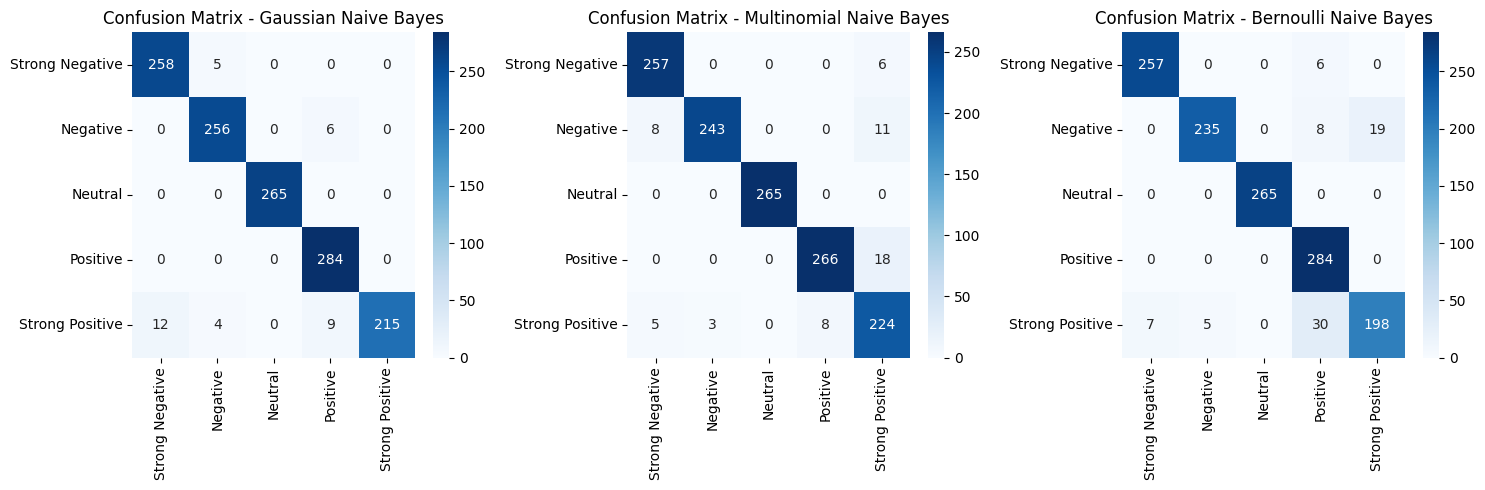

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
ypg = gnb.predict(testx2)
ypm = mnb.predict(testx1)
ypb = bnb.predict(testx3)

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(testy2, ypg)

# Confusion Matrix for Multinomial Naive Bayes
cm_mnb = confusion_matrix(testy1, ypm)

# Confusion Matrix for Bernoulli Naive Bayes
cm_bnb = confusion_matrix(testy3, ypb)

# Plotting Confusion Matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')

plt.subplot(1, 3, 2)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')

plt.subplot(1, 3, 3)
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'], yticklabels=['Strong Negative','Negative', 'Neutral', 'Positive','Strong Positive'])
plt.title('Confusion Matrix - Bernoulli Naive Bayes')

plt.tight_layout()
plt.show()


The above plots are of 3 confusion matrices, Gaussian, Multinomial and Bernoulli. This represents the performance of the Naive Bayes ML model
by showing the number of correct and incorrect predictions that the model made for each data. We can see from the confusion matrix that Gaussian has worked the best among the three, by giving 1277 correct predictions

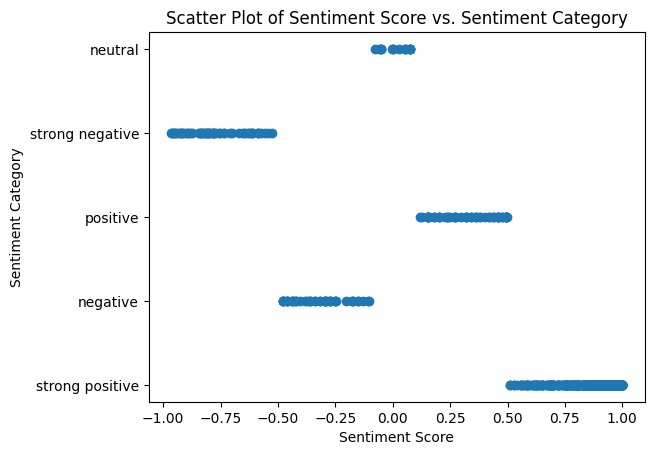

In [104]:
plt.scatter(df['Sentiment'], df['Sentiment_Category'])
plt.title('Scatter Plot of Sentiment Score vs. Sentiment Category')
plt.xlabel('Sentiment Score')
plt.ylabel('Sentiment Category')
plt.show()

The above scatter plot shows the sentiment score compared to their sentiment category. The data points are spread out from -1 to +1. We can see the score distribution for each sentiment category from the above graph. There are some overlapping scores for some categories

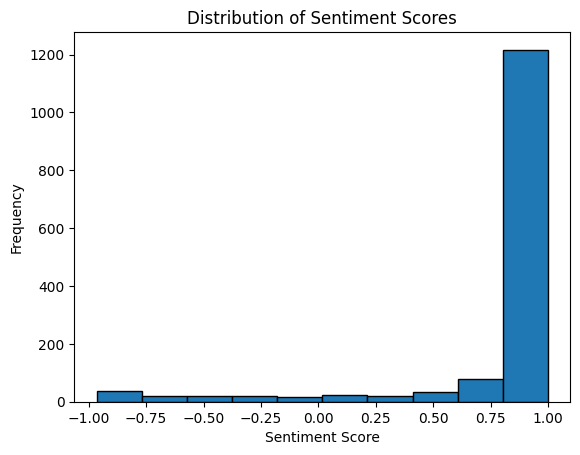

In [105]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment'], bins=10, edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The above histogram shows the distribution of sentiment scores for the Barbie movie dataset. We have sentiment score in the x-axis which is from -1 to +1 and y axis shows the frequency of each sentiment score.
We can see that the peak is at the sentiment score 1 which means that this movie has more number of Strong Positive reviews


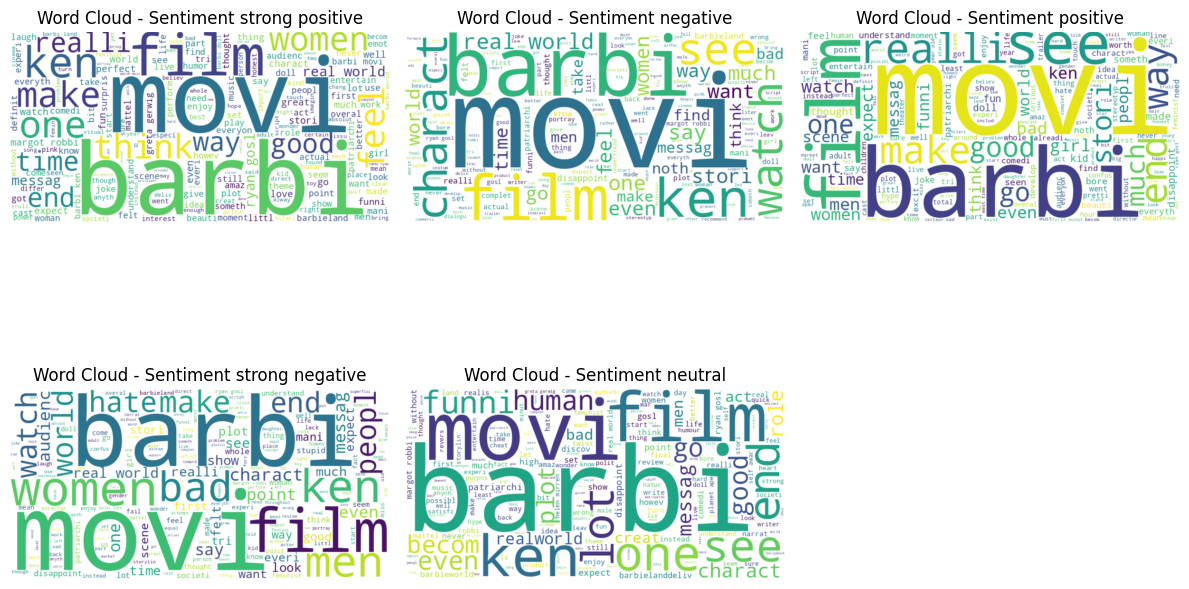

In [106]:
from wordcloud import WordCloud
sentiments = df['Sentiment_Category'].unique()
plt.figure(figsize=(12, 8))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(2, 3, i)
    subset = df[df['Sentiment_Category'] == sentiment]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(subset['Review']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Sentiment {sentiment}')
    plt.axis('off')
plt.tight_layout()
plt.show()


The above WordMap shows the most commonly used words in the reviews that were categorized as Strong Positive, Positive, Neutral, Negative and Strong Negative respectively.

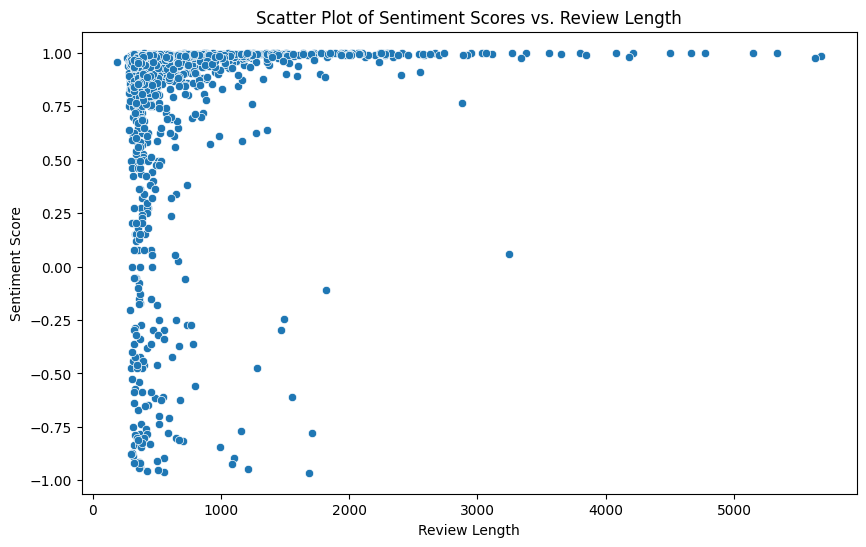

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Review Length'] = df['Review'].apply(len)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review Length', y='Sentiment', data=df)
plt.title('Scatter Plot of Sentiment Scores vs. Review Length')
plt.xlabel('Review Length')
plt.ylabel('Sentiment Score')
plt.show()

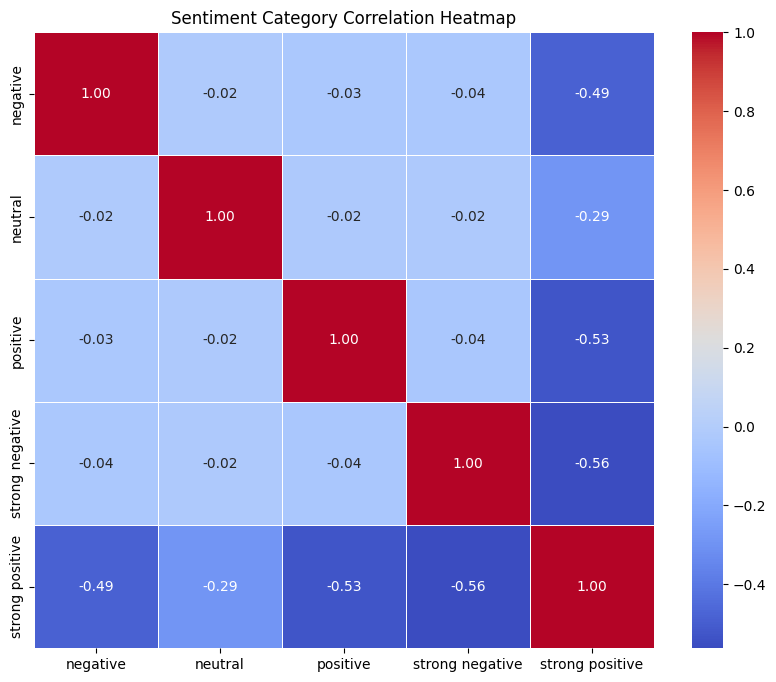

In [47]:
# Calculate the correlation matrix
correlation_matrix = df['Sentiment_Category'].str.get_dummies().corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Sentiment Category Correlation Heatmap')

# Show the plot
plt.show()

This is a heatmap that shows the percentage of people who are positive, negative, and neutral towards different sentiment categories.The heatmap color intensity indicates the strength of correlation between pairs of sentiment categories. Darker colors signify higher positive correlations, while lighter colors suggest weaker or negative correlations.

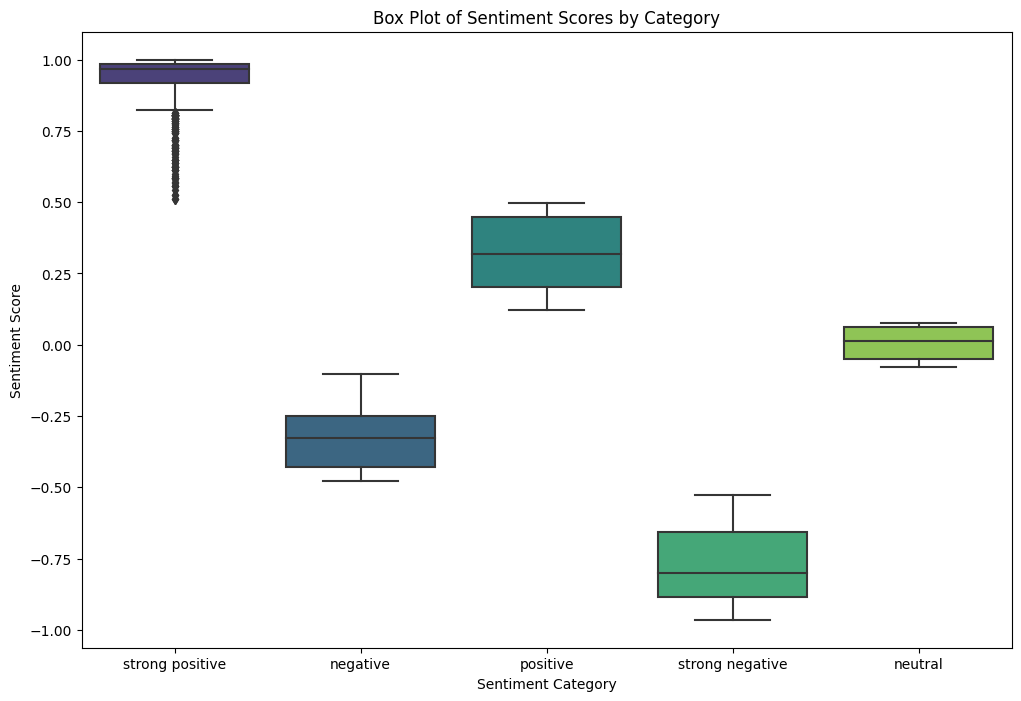

In [48]:
# Setting the size of the figure
plt.figure(figsize=(12, 8))

# Create a box plot for sentiment scores by category
sns.boxplot(x='Sentiment_Category', y='Sentiment', data=df, palette='viridis')

# Set plot title and labels
plt.title('Box Plot of Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score')

# Show the plot
plt.show()

The box plot above shows the median, quartiles and the outliers for each sentiment category. We can see that median is positive for all sentiment categories, except for Strong Negative. There are more outliers for Strong Positive category.

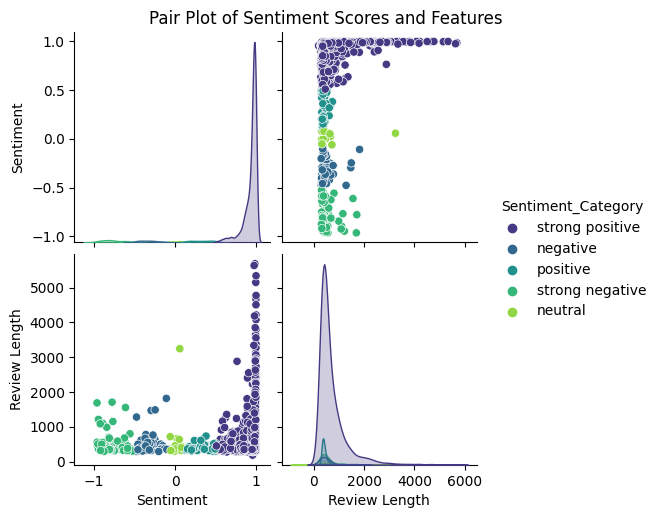

In [49]:
sns.pairplot(df, hue='Sentiment_Category', palette='viridis')
plt.suptitle('Pair Plot of Sentiment Scores and Features', y=1.02)
plt.show()

The above pairplot shows the relationship between review length and sentiment score. We can see that longer reviews seem to have a higher sentiment score
Positive reviews have the strongest positive correlation with the review length. Neutral reviews have the least correlation and Negative reviews have slightly positive correlation.

